### <div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

# Assignment 3

Welcome to your machine learning assignment! In this assignment, you will dive deeper into the exciting world of classification tasks using a linear regression model classifier. We will be using Python and the scikit-learn library to perform these tasks.

In this assignment I will use a *House Prices dataset*, split it into training and testing sets, create a linear regression model, train the model on the training set, make predictions on the testing set, and then evaluate the performance of the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE). 

After that, you will try to do the same thing with a database of used sold cars and train a model to make predictions of the cars prices.

The House Prices dataset can be [found here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)


## Part 1 - How it's done

In this part I will demonstrate how to train a model on existing data by loading the dataset, splitting it into training and testing sets, create a classifier, train the model on the training set, make predictions on the testing set, and then evaluate the performance of the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

### 1. Import the required libraries

First, I import the necessary libraries and modules that will be used in the code:

- `LinearRegression` from `sklearn.linear_model` for implementing the linear regression model.
- `mean_absolute_error` and `mean_squared_error` from `sklearn.metrics` for calculating the evaluation metrics.
- `sqrt` from `math` to compute the square root.
- `pandas` as pd for working with data in a tabular format.
- `train_test_split` from `sklearn.model_selection` for splitting the dataset into training and testing sets.
- `OneHotEncoder` from `sklearn.preprocessing` for handling other data types in our dataset, such as Neighborhood
- `pyplot` from `matplotlib` to visualize the data and the results

In [170]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

### 2. Load and prepare the dataset

To preprocess the dataset, I perform the following steps:

- I specify a list of relevant features that will be used for the analysis. These features include, among others, 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', and 'YearBuilt'.
- I select only the rows that have non-null values for the specified features and the target variable 'SalePrice'. This is done using the `dropna` function, which removes rows with missing values from the DataFrame. The resulting DataFrame will contain only the selected features and the target variable.
- After preprocessing, I split the dataset into features (`X`) and the target variable (`y`) for further analysis. The features are extracted from the DataFrame df by selecting the columns specified in the features list. The target variable 'SalePrice' is extracted separately and assigned to the variable y.

By performing these steps, the code loads the dataset, preprocesses it by selecting relevant features and removing rows with missing values, and then splits it into features (X) and the target variable (y) for further analysis or modeling tasks.

#### Select features

To determine which features are relevant to include in the model training data, we need to consider the nature of the problem and the information provided in the dataset. It is important to select features that have a potential impact on the target variable (SalePrice) and can contribute to the prediction of house prices.

- OverallQual: Overall material and finish quality of the house
- GrLivArea: Above ground living area in square feet
- GarageCars: Size of garage in car capacity
- TotalBsmtSF: Total basement area in square feet
- FullBath: Number of full bathrooms
- YearBuilt: Original construction year of the house
- LotArea: Total lot size in square feet
- Neighborhood: Descriptive location within the city or area
- YearRemodAdd: Remodeling date (same as construction date if no remodeling or additions)
- GarageArea: Size of garage in square feet
- OverallCond: Overall condition rating of the house

These features represent different aspects of the house that could influence its sale price, such as overall quality, size, amenities, and age.

To find and select features, use the different functions for exploration that we have used previously, such as `df.head()`, `df.info()`, and `df.describe()`. You can also find information about the features (columns) in the dataset by visiting the source, in this case Kaggle.com.


In [171]:
# Load the dataset
df = pd.read_csv('A3_house_prices_train.csv')

# Print available features (columns) and their data type
print(df.info())

# Preprocess the dataset
# Select relevant features
features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 
    'LotArea', 'YearRemodAdd', 'GarageArea', 'OverallCond', 'Neighborhood'
]

# Remove rows with missing values
df = df[features + ['SalePrice']].dropna()

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3. Working with other data types

To train the model on data like Neighborhood, which is a string instead of a number (float or int), we have to encode it using OneHotEncoder. Take a look at the columns by calling `df.info()` and `df.head()`, each 'Neighborhood'  value now has its own column, which is great for training the model.

In [172]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Extract the "Neighborhood" column from the DataFrame
neighborhood_data = df[['Neighborhood']]

# Apply OneHotEncoder to the "Neighborhood" column
neighborhood_encoded = encoder.fit_transform(neighborhood_data)

# Create a DataFrame with the encoded neighborhood data
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(['Neighborhood']))

# Concatenate the encoded neighborhood DataFrame with the original DataFrame
df_encoded = pd.concat([df, neighborhood_encoded_df], axis=1)

# Drop the original "Neighborhood" column from the DataFrame
df_encoded.drop('Neighborhood', axis=1, inplace=True)

# Save encoded data to the DataFrame 
df = df_encoded

# Let's see the results
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           1460 non-null   int64  
 1   GrLivArea             1460 non-null   int64  
 2   GarageCars            1460 non-null   int64  
 3   TotalBsmtSF           1460 non-null   int64  
 4   FullBath              1460 non-null   int64  
 5   YearBuilt             1460 non-null   int64  
 6   LotArea               1460 non-null   int64  
 7   YearRemodAdd          1460 non-null   int64  
 8   GarageArea            1460 non-null   int64  
 9   OverallCond           1460 non-null   int64  
 10  SalePrice             1460 non-null   int64  
 11  Neighborhood_Blmngtn  1460 non-null   float64
 12  Neighborhood_Blueste  1460 non-null   float64
 13  Neighborhood_BrDale   1460 non-null   float64
 14  Neighborhood_BrkSide  1460 non-null   float64
 15  Neighborhood_ClearCr 

### 4. Split data into training and testing sets

Now I am ready to split the dataset into training and test data by using the train_test_split function. This function divides the data into training and testing sets based on a specified ratio. The training set will be used to train the model, while the testing set will be used to evaluate its performance.

In [173]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)  # Exclude the 'SalePrice' column from features
y = df['SalePrice']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### 5. Create an instance of the LinearRegression class and fit the model to the training data

After splitting the dataset, I instantiate an instance of the LinearRegression class, which represents the linear regression model.

Then, I fit the model to the training data using the `fit` method. This step trains the model by finding the best-fitting line that minimizes the difference between the predicted values and the actual target values.

In [174]:
# Create linear regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

LinearRegression()

### 6. Make predictions on the testing set

Now that the model is trained, I can make predictions on the testing set using the predict method. This step allows me to obtain the predicted values for the target variable based on the features in the testing set.

In [175]:
# Make predictions on the testing set
y_pred = regressor.predict(X_test)

y_pred.shape

(292,)

### 7. Evaluate the performance of the model using MAE, MSE, and RMSE

To evaluate the performance of the model, I calculate two commonly used metrics: mean absolute error (MAE) and mean squared error (MSE). These metrics measure the average absolute difference and the average squared difference, respectively, between the predicted and actual values. I import these metrics from sklearn.metrics and calculate them using the predicted values and the actual values from the testing set.

Finally, I may also calculate the root mean squared error (RMSE) by taking the square root of the mean squared error. This metric provides a measure of the average magnitude of the prediction errors in the same units as the target variable.

In [176]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 19927.622959566263
Mean Squared Error (MSE): 1182480620.460772
Root Mean Squared Error (RMSE): 34387.215945184806


### 8. Analyzing the results

#### Mean Absolute Error (MAE):

MAE measures the average absolute difference between the predicted and actual values.
In this case, the MAE is approximately 19 927.
It indicates that, on average, the model's predictions have an absolute difference of around 19 927 units (dollars) from the actual values.
A lower MAE value suggests better accuracy, as it represents smaller prediction errors.

#### Mean Squared Error (MSE):

MSE calculates the average of the squared differences between the predicted and actual values.
The MSE value is approximately 1 182 480 620
It quantifies the average squared deviation of the model's predictions from the actual values.
A lower MSE indicates a better fit, as it represents smaller overall prediction errors.

#### Root Mean Squared Error (RMSE):

RMSE is the square root of MSE and provides a measure of the average magnitude of the prediction errors.
The RMSE value is approximately 34387.
It represents the average difference between the predicted and actual values, in the same units as the target variable (dollars).
Similar to MAE and MSE, a lower RMSE value indicates better accuracy and a smaller average prediction error.

### 9. Visualizing the results

To get a better understanding of how our model performed, we can plot the data using these plots

#### Scatter Plot: 

From a scatter plot, we can observe the relationship between two variables. If the data points form a clear pattern or follow a linear trend, it indicates a strong correlation between the variables. Additionally, we can identify any outliers or clusters in the data.

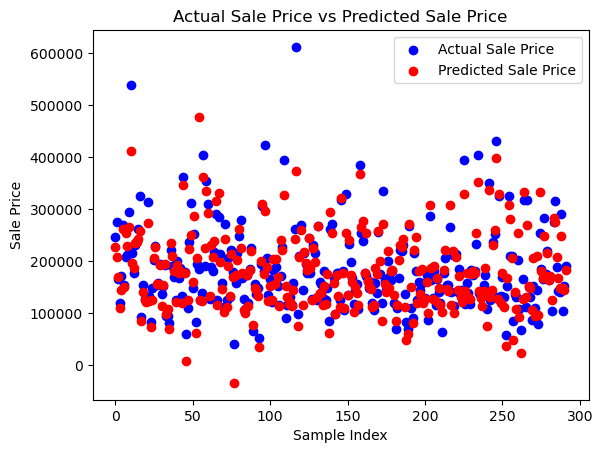

In [177]:
# Plotting the sale price
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sale Price')
# Plotting the predictions
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Sale Price')

plt.title('Actual Sale Price vs Predicted Sale Price')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

#### Line Plot: 

A line plot helps us visualize the trend or progression of a variable over time or data points. We can observe whether the variable increases, decreases, or remains relatively constant. It allows us to identify patterns, seasonality, or trends in the data.

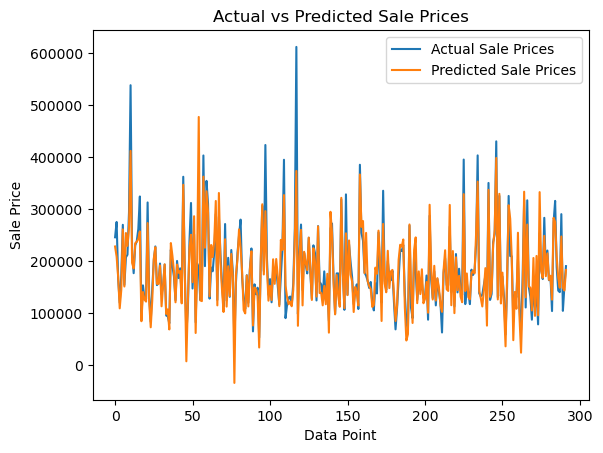

In [178]:
plt.plot(range(len(y_test)), y_test, label='Actual Sale Prices')
plt.plot(range(len(y_test)), y_pred, label='Predicted Sale Prices')
plt.xlabel('Data Point')
plt.ylabel('Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.legend()
plt.show()

#### Histogram: 

By examining a histogram, we can determine the distribution of a single variable. It provides insights into the data's central tendency, spread, and shape. We can identify whether the data is normally distributed, skewed, or exhibits multiple peaks. Outliers or unusual patterns can also be detected.

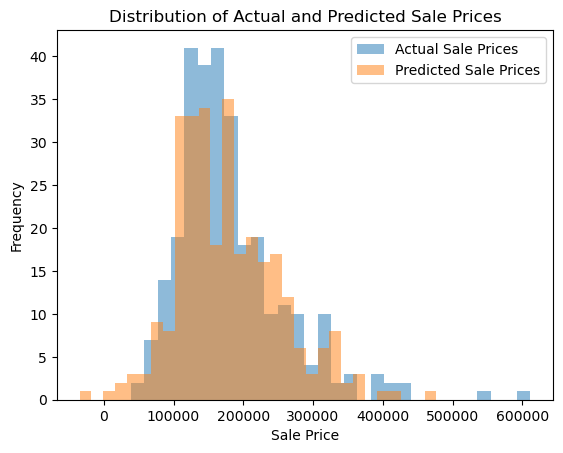

In [179]:
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sale Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Sale Prices')
plt.legend()
plt.show()

#### Box Plot: 

A box plot summarizes the distribution of a variable and highlights important summary statistics. It allows us to identify the median, quartiles, and potential outliers. We can assess the spread of the data, skewness, and any extreme values that fall beyond the whiskers.

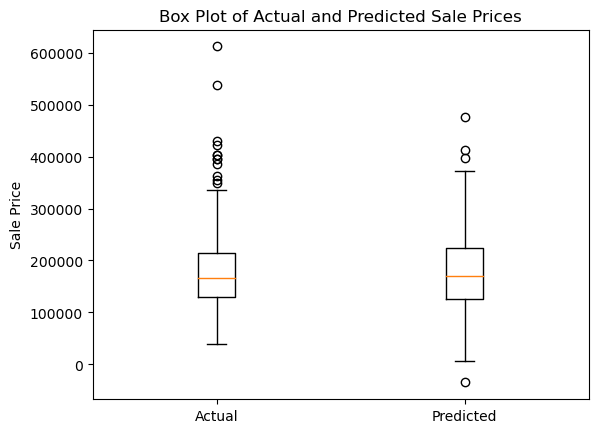

In [180]:
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
plt.ylabel('Sale Price')
plt.title('Box Plot of Actual and Predicted Sale Prices')
plt.show()

#### Residual Plot: 

Analyzing a residual plot helps us assess the performance of a regression model. We can determine whether the residuals exhibit any patterns or systematic deviations from the expected zero line. It helps us identify potential issues such as heteroscedasticity, non-linearity, or influential outliers in the model.

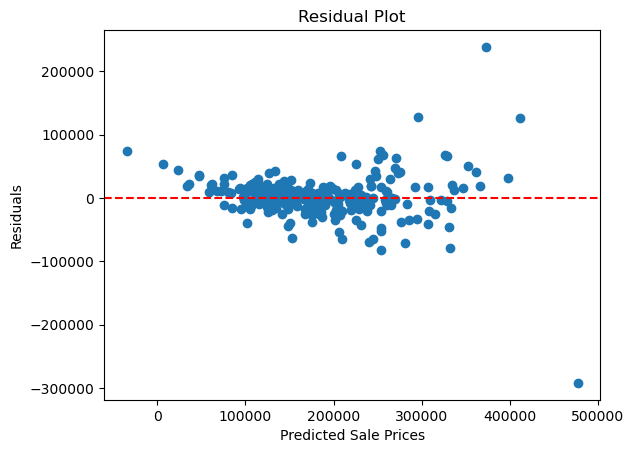

In [181]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

---

## 2. Your turn

Now it's your turn!

The required packages are loaded an imported at the start of this document, so you're ready to get started. Your objective is to train a model on the following dataset of Ford cars: [Kaggle.com Ford Car Price Prediction](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction)

### 1. Load and prepare the dataset

Load and prepare the dataset by doing the following:

- Load the data with `pd.readcsv(...)`
- Use `df.info()` and `df.describe()` to explore the dataset.
- Select relevant features like I did in my example above.

In [182]:
# Code here
df = pd.read_csv('A3_ford.csv')

print(df.info())

features = [
    'model', 'year', 'mileage', 'fuelType', 'engineSize'
]

df = df[features + ['price']].dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None


### 2. Encode string data types

Now you need to encode some of the data. In my example I used `OneHotEncoder` but you can use `LabelEncoder` instead since there are more columns to encode and more possible values per column. The columns you may want to encode are the columns with the datatype of `object` which you can see by using `df.info()`. THe column called `model` is one of them, but there's two more.

To encode the `model` column/attribute you need to:

- Initialize LabelEncoder using `LabelEncoder()` and save it to a variable (name it `encoder` for clarity).
- Use `encoder.fit_transform(df['model'])` to encode the column. This returns an encoded column which you can save to a new column with any name you'd like. Like this: `df['model_encoded'] = encoder.fit_transform(df['model'])`
- Drop the column you encoded from (`model`) by using `df.drop(...)`
- Now do the same for the other two columns.

When you think you're done, call `df.info()` and make sure all columns are number values such as `int32`, `int64`, or `float64`.

In [183]:
# Code here
encoder = LabelEncoder()
df['model_encoded'] = encoder.fit_transform(df[['model']])
df.drop('model', axis=1, inplace=True)

df['fuelType_encoded'] = encoder.fit_transform(df[['fuelType']])
df.drop('fuelType', axis=1, inplace=True)

# Let's see the results
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              17966 non-null  int64  
 1   mileage           17966 non-null  int64  
 2   engineSize        17966 non-null  float64
 3   price             17966 non-null  int64  
 4   model_encoded     17966 non-null  int32  
 5   fuelType_encoded  17966 non-null  int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 701.9 KB
None


C:\Users\holsson6\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\holsson6\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3. Split data into training and testing sets

Do just as I did in my example above to split the dataset into features (`X`) and target variable (`y`) and then use `train_test_split(...)` to create training and testing sets.

In [184]:
# Code here
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 4. Create an instance of the LinearRegression class and fit the model to the training data

After splitting the dataset, instantiate an instance of the LinearRegression class, which represents the linear regression model.

Then fit the model to the training data using the `fit` method. This step trains the model by finding the best-fitting line that minimizes the difference between the predicted values and the actual target values.

In [185]:
# Code here
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

### 5. Make predictions on the testing set

Now that the model is trained, you can make predictions on the testing set using the `predict` method. This step lets you obtain the predicted values for the target variable based on the features in the testing set.

Print the shape of your predictions to ensure that everything is OK. By calling `print(y_pred.shape)` you should get the result `(3594,)`. This shows you that the predictions is a one dimensional array of 3549 values, which looks right if you split your dataset test data to 20% by setting `test_size=0.2` in the previous step. 

> **Explanation**: The dataset consist of 17966 rows and by setting `test_size` to 0.2 you split the test data to 20% of all rows, which is about 3593 (`17966 x 0.2 = 3 593.2`). If you get a few more or less it's still OK since `train_test_split` will give you a random selection of rows and the exact number may differ because of it.

In [186]:
# Code here
y_pred = regressor.predict(X_test)

y_pred.shape

(3594,)

### 6. Evaluate the performance of the model using MAE, MSE, and RMSE

- Use `mean_absolute_error(...)` to calculate the Mean Absolute Error (MAE)
- Use `mean_squared_error(...)` to calculate the Mean Squared Error (MSE)
- Use `sqrt(...)` to calculate the Root Mean Squared Error (RMSE)

Print the results when you're done. Compare the results to the mean price and standard deviation of the full dataset (you get these by calling `df['price'].describe()`. Can you draw any conclusions from your results? Is your model good at predicting the prices?

In [187]:
# Code here
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1896.0673894936006
Mean Squared Error (MSE): 7069448.133766539
Root Mean Squared Error (RMSE): 2658.843382707327


### 7. Visualize the results

Follow my examples above to visualize the data using the following plot types:

#### Scatter Plot

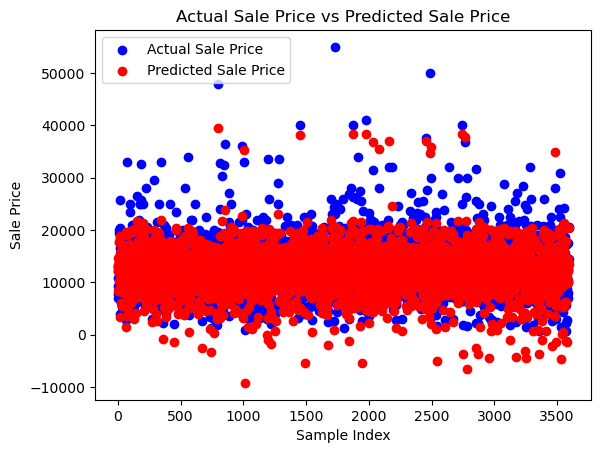

In [188]:
# Code here
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sale Price')
# Plotting the predictions
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Sale Price')

plt.title('Actual Sale Price vs Predicted Sale Price')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

#### Histogram Plot

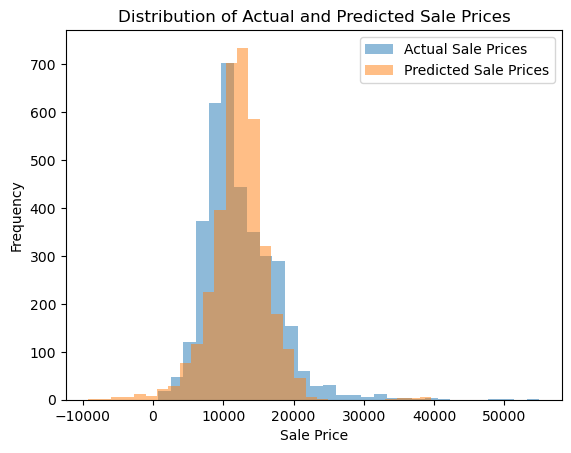

In [189]:
# Code here
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sale Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Sale Prices')
plt.legend()
plt.show()

#### Box Plot

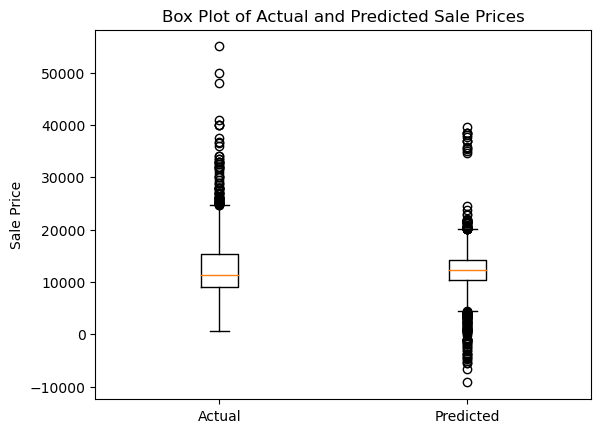

In [190]:
# Code here
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
plt.ylabel('Sale Price')
plt.title('Box Plot of Actual and Predicted Sale Prices')
plt.show()

#### Residual plot

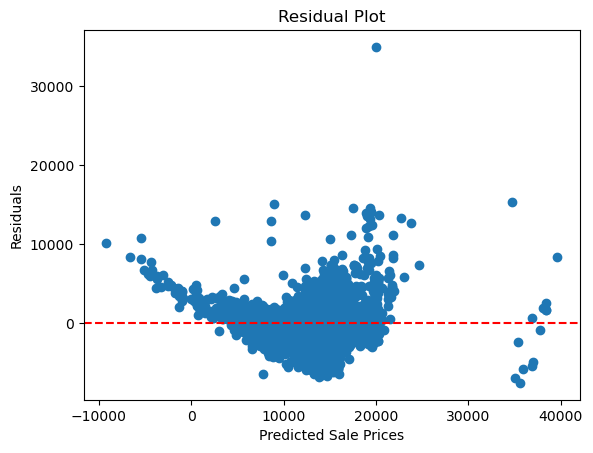

In [191]:
# Code here
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Complete!

Submit your work by pushing the changes to Github, inviting the teacher/s to your repository and submitting this link on ItsLearning under Assignment 3.